# 2.1. USMJERENE MREŽE SOCIJALNIH INTERAKCIJA

U drugom djelu ove pokazne vježbe koristimo znanstvene Twitter podatke za stvaranje i istraživanje usmjerenih mreža društvenih interakcija. 

## DATASET:

In [69]:
import json
search_tweets = json.load(open('science_tweets.json'))

Svaki tweet zapravo je jedna instanca Tweet objekta (https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)

In [70]:
search_tweets[:2]

[{'created_at': 'Mon Dec 03 14:59:01 +0000 2018',
  'id': 1069606939284422656,
  'id_str': '1069606939284422656',
  'text': 'How to properly cook @ChefBoyardee. Oh and the lava is cool too. #science #NASASocial (Video by Brave Bison) https://t.co/l3R6UMvUTJ',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'science', 'indices': [65, 73]},
    {'text': 'NASASocial', 'indices': [74, 85]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'ChefBoyardee',
     'name': 'Chef Boyardee',
     'id': 876145244,
     'id_str': '876145244',
     'indices': [21, 34]}],
   'urls': [],
   'media': [{'id': 1069606177363935232,
     'id_str': '1069606177363935232',
     'indices': [109, 132],
     'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1069606177363935232/pu/img/1uN8Rd3GPIJ2f6K7.jpg',
     'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1069606177363935232/pu/img/1uN8Rd3GPIJ2f6K7.jpg',
     'url': 'https://t.co/l3R6UMvUTJ',
     'display_url': 'pic.twitter.

# Twitter retweetanje

Temeljna interakcija u ekosustavu Twittera je "retweet" -- ponovno emitiranje tweeta drugog korisnika vašim pratiteljima. 

## Filtriranje retweetova

U našem skupu podataka nalaze se retweetovi. Objekt tweeta koji se nalazi u našem datasetu je retweet ako uključuje 'retweeted_status'. Napravit ćemo novi skup podataka koji će se sastojati samo od retweetova:

In [71]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

511

## Izrada DiGrafa

Prikazat ćemo tweetove na ovom popisu retweetova u smjeru protoka informacija: od korisnika koji je retweetao do retweetara, korisnika čija je objava retweetana. Budući da korisnik može retweetati objave drugog korisnika više puta, želimo da ovaj graf bude težinski, s brojem retweeta kao težinom - brojimo koliko je puta neki korisnik retweetao objave nekog drugog korisnika.

In [72]:
import networkx as nx

D = nx.DiGraph() #inicijalizacija usmjerenog grafa

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name'] #ime korisnika koji je retweetao
    retweeter_sn = retweet['user']['screen_name'] #ime ciji je tweet retweetan
    
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)
    

In [73]:
D.edges

OutEdgeView([('AntonioParis', 'invenitmundo'), ('AntonioParis', 'kingchar12'), ('AntonioParis', 'jackattent0011'), ('AntonioParis', 'stuartparks88'), ('AntonioParis', 'BLajeunesse'), ('AntonioParis', 'fueledbyvinyl'), ('AntonioParis', 'AlanJac10051970'), ('AntonioParis', 'Charion1234'), ('AntonioParis', 'EdouardDugas'), ('AntonioParis', 'RoyCalbeck'), ('AntonioParis', 'romanw3_252'), ('AntonioParis', 'MarkKtheUXGuy'), ('AntonioParis', 'OrsonJTrump'), ('AntonioParis', 'AntonioParis'), ('AntonioParis', 'fredvell'), ('AntonioParis', 'AmyHayward1979'), ('AntonioParis', 'daimonoflove'), ('AntonioParis', 'towersunset132'), ('AntonioParis', 'MarioJaraFigue1'), ('AntonioParis', 'BatKat37'), ('AntonioParis', 'TheTaterX'), ('AntonioParis', 'kam75'), ('AntonioParis', 'RogerIceman'), ('AntonioParis', 'KelsTheKat'), ('AntonioParis', 'leticiabarcenas'), ('AntonioParis', 'TheHerme5'), ('AntonioParis', 'JensMeier144'), ('AntonioParis', 'TheAeronut'), ('AntonioParis', 'abid_tanjim'), ('AntonioParis', '

Logika dodavanja bridova je povećati težinu brida za 1 ako brid postoji ili stvoriti brid s težinom 1 ako ne postoji.

Kada pišete kod kao što je ovaj koji se više puta referira na isti usmjereni brid, pazite da budete u skladu sa smjerom brida.

## Analiza grafa

### Najviše retweetani korisnik

Budući da su bridovi u smjeru protoka informacija, out-degree nam daje broj korisnika koji retweetaju određenog korisnika. Možemo dobiti korisnika s najvišim stupnjem izlaza pomoću ugrađene max  funkcije (korisnika čije se objave najviše retweetaju):

In [74]:
max(D.nodes, key=D.out_degree)

'AntonioParis'

ali možemo dobiti i više informacija za "najboljih N" korisnika:

In [75]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[('AntonioParis', 49),
 ('JaviTannhauser', 15),
 ('illucifer', 11),
 ('maximaxoo', 10),
 ('BetteAStevens', 8)]

U ovom dijelu koda koristimo činjenicu da D.out_degree() vraća niz (ime, stupanj) tuplova; key=itemgetter(1) govori sortiranoj funkciji da sortira ove tuplove prema njihovoj vrijednosti na indeksu 1. Postavljanje reverse=True govori sortiranoj funkciji da to želimo u silaznom redoslijedu, a [:5] daje nam prvih 5 stavki s rezultirajuće liste.

Međutim, ovo je težinski graf! Prema zadanim postavkama, out_degree() zanemaruje težine rubova. Možemo dobiti izlaznu težinu tako da kažemo funkciji out_degree() da uzme u obzir težinu bridova:

In [76]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('AntonioParis', 50),
 ('JaviTannhauser', 15),
 ('illucifer', 11),
 ('maximaxoo', 10),
 ('AgiwaldW', 9)]

U nekim će slučajevima ova dva rezultata biti ista, npr. ako niti jednog od ovih korisnika nije više puta retweetao isti korisnik. Ovisno o vašem slučaju upotrebe, možete ili ne morate uzeti težine u obzir.

### Detekcija anomalija

Jedna vrsta manipulacije društvenih medija uključuje račune koji stvaraju vrlo malo originalnog sadržaja, umjesto toga "spammaju" retweetove svih sadržaja u određenom razgovoru. To su potencijalno korisnici koji puno više retweetaju od ostalih. Možemo li otkriti da neki korisnici znatno više retweetaju od ostalih? Pogledajmo N korisnika koji najčešće retweetaju:

In [77]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('Tess_blue815', 8),
 ('CastevenLimKHJB', 5),
 ('Emc2CoinHQ', 3),
 ('cosmicscape', 3),
 ('jhainley1', 3)]

### Povezanost

Možemo se pitati predstavljaju li tweetovi jedan veliki razgovor ili mnogo malih razgovora; općenito govoreći, svaka slabo povezana komponenta predstavlja razgovor.

In [78]:
nx.is_weakly_connected(D)

False

Tweetovi definitivno ne predstavljaju jedan veliki razgovor, no ono što možemo očekivati je da postoji velik broj malih razgovora. Pogledajmo koliko:

In [79]:
nx.number_weakly_connected_components(D)

246

### Crtanje grafa

Možemo pokušati nacrtati ovaj graf s čvorovima veličine prema njihovoj izlaznoj snazi:

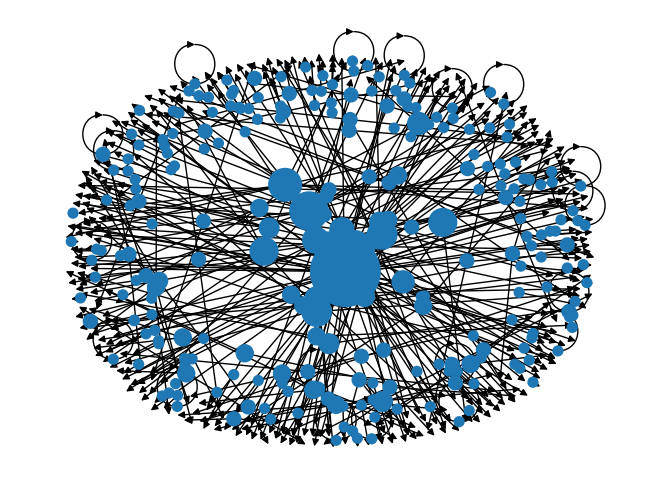

In [80]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes] # množimo s 50 da bi nam čvorovi na slici izgledali veće

%matplotlib inline
nx.draw(D, node_size=node_sizes)

Imajte na umu da u ovom pojednostavljenom crtežu čvorovi s nultom vanjskom težinom nisu nacrtani na grafu jer je njihova veličina 0. To nam odgovara; ovdje su izvučeni samo korisnici koji su retweetani, ne i oni čije objave nitko nikad nije retweetao.

# Twitter spominjanja

Druga Twitter interakcija između korisnika događa se kada jedan korisnik spomene drugog u tweetu pod svojim @screen_name. Kao primjer, razmotrite sljedeći hipotetski tweet od @osome_iu:

"Check out the new @IUSICE and @USC_ISI research https://..."

Od ovog tweeta stvorili bismo dva brida:

('osome_iu', 'IUSICE')
('osome_iu', 'USC_ISI')

Na nama je u kojem ćemo smjeru povući te rubove, ali moramo biti dosljedni. U ovom primjeru nacrtat ćemo rubove u smjeru toka pozornosti: @osome_iu posvećuje pozornost @IUSICE i @USC_ISI.

## Izrada DiGrafa

Kao što smo na početku spomenuli, svaki tweet predstavljen je značajkom Tweet Object i svaki tweet ima Entitete (https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/entities#entitiesobject) koji uvijek sadržavaju popis 'user_mentions' pa čak i kad je taj popis prazan. Zbog toga nije potrebno filtrirati tweetove koji sadrže spominjanja. 

In [81]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*edge):
            D.edges[edge]['weight'] += 1
        else:
            D.add_edge(*edge, weight=1)

D.edges

OutEdgeView([('AntonioParis', 'ChefBoyardee'), ('AntonioParis', 'AntonioParis'), ('jessphoenix2018', 'EPA'), ('invenitmundo', 'AntonioParis'), ('invenitmundo', 'ExploreSpaceKSC'), ('invenitmundo', 'SpaceX'), ('kingchar12', 'AntonioParis'), ('jusenavalyv', 'ProfRobStew'), ('anitaleirfall', 'LogicalAnalysis'), ('shashiiyengar', 'KetoScience'), ('BazilleAnais', 'ModisFrance'), ('DFID_UK', 'DFID_Research'), ('OmicsOmicsBlog', 'HumanVacProject'), ('jackattent0011', 'AntonioParis'), ('jackattent0011', 'ExploreSpaceKSC'), ('jackattent0011', 'SpaceX'), ('stuartparks88', 'AntonioParis'), ('stuartparks88', 'ChefBoyardee'), ('LeftyBotty', 'BiggerSign'), ('LeftyBotty', 'joerogan'), ('BiggerSign', 'joerogan'), ('BLajeunesse', 'AntonioParis'), ('BLajeunesse', 'ChefBoyardee'), ('fueledbyvinyl', 'AntonioParis'), ('fueledbyvinyl', 'ChefBoyardee'), ('WebCast411', 'SciFactPodcast'), ('SciFactPodcast', 'SteveBrusatte'), ('Birdmischief', 'maximaxoo'), ('lidradesign', 'redbubble'), ('Cienciaaldia', 'AmoebaS

## Analiza grafa

### Najpopularniji korisnici

Budući da su ti bridovi u smjeru protoka pažnje, in-degree nam daje broj drugih korisnika koji spominju određenog korisnika. Možemo dobiti korisnika s najvišim stupnjem pomoću ugrađene max funkcije - korisnika koji se najčešće spominje od strane drugih:

In [82]:
max(D.nodes, key=D.in_degree)

'AntonioParis'

ali opet možemo dobiti i više informacija za "najboljih N" korisnika - korisnika koji se najčešće spominju:

In [83]:
from operator import itemgetter

sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

[('AntonioParis', 49),
 ('astronomy', 15),
 ('JaviTannhauser', 15),
 ('ChefBoyardee', 12),
 ('illucifer', 11)]

Korištenjem weight='weight' možemo dobiti prvih 5 korisnika prema ulaznoj težini umjesto prema ulaznom stupnju:

In [84]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('AntonioParis', 50),
 ('astronomy', 15),
 ('JaviTannhauser', 15),
 ('UN', 14),
 ('ChefBoyardee', 13)]

U nekim će slučajevima ova dva rezultata biti ista,npr. ako nijednog od ovih korisnika nije više puta spomenuo isti korisnik. Ovisno o vašem slučaju upotrebe, možete ili ne morate uzeti težine u obzir.

### Pokretaći razgovora - Conversation drivers

Korisnik koji spominje mnoge druge u razgovoru možda "pokreće" razgovor i pokušava uključiti druge u dijalog. Takav korisnik može biti i spam. Da vidimo tko ovdje najviše spominje - ovdje gledamo vrijednost out degree:

In [85]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('51Prentice', 11),
 ('Tess_blue815', 8),
 ('plantletculture', 6),
 ('Matt_Lucy_JDS', 5),
 ('CastevenLimKHJB', 5)]

### Povezanost

Možemo pitati predstavljaju li tweetovi dobiveni pretraživanjem jedan veliki razgovor ili mnogo malih razgovora; općenito govoreći, svaka slabo povezana komponenta predstavlja razgovor.

In [86]:
nx.is_weakly_connected(D)

False

In [87]:
nx.number_weakly_connected_components(D)

300

### Crtanje grafa

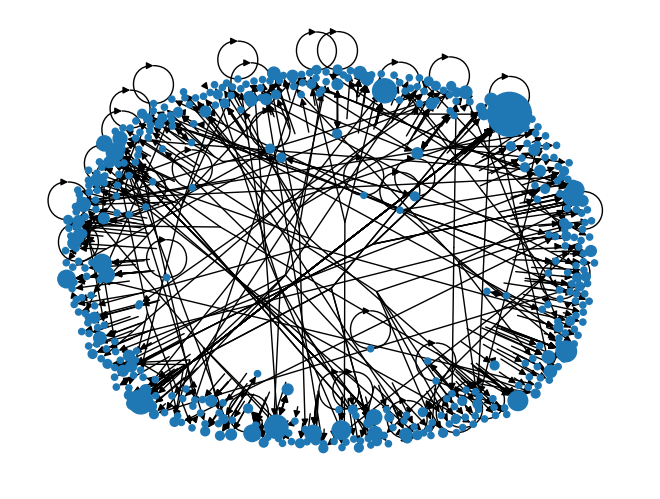

In [88]:
node_sizes= [D.in_degree(n, weight='weight') * 20 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

Kao i u prethodnom primjeru, u ovom pojednostavljenom crtežu čvorovi s nultom vanjskom težinom nisu nacrtani na grafu jer je njihova veličina 0. To nam odgovara; ovdje su izvučeni samo korisnici koji su bili nekad spomenuti od strane drugih korisnika.

# 2.2. PAGE RANK ALGORITAM

PageRank je algoritam za izračunavanje mjere centralnosti koja ima za cilj uhvatiti važnost svakog čvora. Obično se koristi u usmjerenim grafovima (mrežama). Kada se primijeni na webu, algoritam svakoj stranici dodjeljuje PageRank vrijednost. Algoritam za rangiranje tražilice tada može koristiti ovu vrijednost, u kombinaciji s mnogim drugim čimbenicima — kao što je podudaranje između upita i teksta stranice — za sortiranje rezultata upita. Stranica s visokim PageRank-om smatra se važnom, a algoritam za rangiranje joj daje prednost: ako su ostale stvari iste, stranice s većim PageRank-om rangirane su više.

Učitat ćemo novi dataset kao DiGraf: math Wikipedia dataset:

In [89]:
D = nx.read_graphml('enwiki_math.graphml')

In [90]:
len(D) # broj čvorova -> isto kao da pise len(D.nodes)

15220

In [91]:
sorted(D.degree, key=lambda x: x[1], reverse=True)[:5]

[('1152126', 5181),
 ('18831', 4987),
 ('18902', 4198),
 ('1485646', 2084),
 ('198822', 1683)]

Nad učitanim datasetom pokrenut ćemo PageRank algoritam i izračunati PageRank za svaki od članaka:

In [92]:
pr = nx.pagerank(D, alpha=0.85)

Zanima nas kojih je top 10 članaka po izračunatom PageRank-u:

In [93]:
sorted(pr, key=itemgetter(1), reverse=True)[:10]

['39190532',
 '39485455',
 '393258',
 '491570',
 '8907443',
 '49277621',
 '2916430',
 '39125005',
 '294993',
 '39125084']

Želimo usporediti top 10 članaka po PageRanku s top 10 članaka po in degree-u. Hoće li to biti isti članci?

In [94]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:10]

[('1152126', 5171),
 ('18831', 4853),
 ('18902', 4148),
 ('1485646', 2072),
 ('198822', 1581),
 ('1234374', 1561),
 ('20120951', 1531),
 ('48396', 797),
 ('627842', 642),
 ('24295969', 586)]

Distribucija PageRanka je prilično slična distribuciji in-degree-a na webu. Zašto onda jednostavno ne upotrijebite in-degree za rangiranje? Moramo uzeti u obzir da nisu sve staze jednake. Putevi sa stranica koje se često posjećuju daju veći doprinos. Drugim riječima, na važnost stranice utječe važnost stranica koje povezuju na nju.